In [15]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
save_path = '/Users/jwhickey/Nolan Lab Dropbox/John Hickey/CRUK/Cell_Atlas/analysis/cell_cellpairing/'

#read in csv
df = pd.read_csv(save_path+'processed_stats10000_perm.csv', index_col=0)

#Get rid of Nan and B cell because not frequent
dfn = df.loc[~(df['p value'].isnull().values)]
dfn

,Cell Pair,unique_region,p value,FC,Number Occurred,Fraction of Neighbors
0,B cell_B cell,E08_reg001,0.0000,0.000000,0.0,0.000000
1,B cell_CD4+ T cell,E08_reg001,0.9924,2.496217,8.0,0.380952
2,B cell_CD4+ T cell PD1+,E08_reg001,0.2311,0.622285,2.0,0.095238
3,B cell_CD4+ Treg,E08_reg001,0.5170,1.017680,4.0,0.190476
4,B cell_CD8+ T cell,E08_reg001,0.4219,0.877737,3.0,0.142857
...,...,...,...,...,...,...
53482,Squamous p63+_Smooth Muscle,E08_reg002,0.0000,0.000000,0.0,0.000000
53484,Squamous p63+ EGFRhi_DC,E08_reg002,0.0000,0.000000,0.0,0.000000
53487,Squamous p63+ EGFRhi_Epithelial pH2AX+,E08_reg002,0.0000,0.000000,0.0,0.000000
53493,Squamous p63+ EGFRhi_Plasma,E08_reg002,0.0000,0.000000,0.0,0.000000


In [3]:
#Select significant data
dfs = dfn.loc[(dfn['p value']<0.05)|(dfn['p value']>0.95)]
dfl = dfn.loc[(dfn['p value']<0.05)]
dfh = dfn.loc[(dfn['p value']>0.95)]

#Select only ones that occur in tissue more than 5 times
df_no = dfh.loc[(dfh['Number Occurred']>5)]
df_no

,Cell Pair,unique_region,p value,FC,Number Occurred,Fraction of Neighbors
1,B cell_CD4+ T cell,E08_reg001,0.9924,2.496217,8.0,0.380952
31,B cell_Stroma,E08_reg001,0.9933,1.589212,28.0,1.333333
36,CD4+ T cell_CD8+ T cell,E08_reg001,0.9819,1.467170,31.0,0.215278
46,CD4+ T cell_Epithelial Ki67+ p53+,E08_reg001,0.9921,1.335324,69.0,0.479167
55,CD4+ T cell_Neck,E08_reg001,0.9923,1.453013,44.0,0.305556
...,...,...,...,...,...,...
53317,Squamous p63+_Endothelial CD36hi,E08_reg002,0.9992,1.298976,107.0,0.037610
53318,Squamous p63+_Epithelial,E08_reg002,0.9960,1.745029,16.0,0.005624
53323,Squamous p63+_M1 Macrophage,E08_reg002,1.0000,1.531687,73.0,0.025659
53328,Squamous p63+_Squamous Annexin A1+,E08_reg002,1.0000,1.124661,14447.0,5.078032


In [4]:
path_to_meta = '/Users/jwhickey/Nolan Lab Dropbox/John Hickey/CRUK/Cell_Atlas/Pathologist_common_Cell_atlas.csv'
dfm = pd.read_csv(path_to_meta)

meta={}
for col in dfm.columns.to_list():
    meta[col] = dict(zip(dfm['unique_region'],dfm[col]))
    df_no[col] = df_no['unique_region'].map(meta[col])
df_no

<ipython-input-4-bf956dddfd7b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no[col] = df_no['unique_region'].map(meta[col])
<ipython-input-4-bf956dddfd7b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no[col] = df_no['unique_region'].map(meta[col])
<ipython-input-4-bf956dddfd7b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Cell Pair,unique_region,p value,FC,Number Occurred,Fraction of Neighbors,Accession number,Sample,Block type,Initial block diagnosis,% invasive,% dysplasia,% metaplasia,% normal squamous,% HG dysplasia,% LG dysplasia,% Glandular,% metaplasia (not glandular),consensus diagnosis,Sub diagnosis
1,B cell_CD4+ T cell,E08_reg001,0.9924,2.496217,8.0,0.380952,AS19-51072,B1,Biopsy,DT,3.333333,53.333333,43.333333,0.0,48.333333,5.0,0.0,43.333333,D,MD
31,B cell_Stroma,E08_reg001,0.9933,1.589212,28.0,1.333333,AS19-51072,B1,Biopsy,DT,3.333333,53.333333,43.333333,0.0,48.333333,5.0,0.0,43.333333,D,MD
36,CD4+ T cell_CD8+ T cell,E08_reg001,0.9819,1.467170,31.0,0.215278,AS19-51072,B1,Biopsy,DT,3.333333,53.333333,43.333333,0.0,48.333333,5.0,0.0,43.333333,D,MD
46,CD4+ T cell_Epithelial Ki67+ p53+,E08_reg001,0.9921,1.335324,69.0,0.479167,AS19-51072,B1,Biopsy,DT,3.333333,53.333333,43.333333,0.0,48.333333,5.0,0.0,43.333333,D,MD
55,CD4+ T cell_Neck,E08_reg001,0.9923,1.453013,44.0,0.305556,AS19-51072,B1,Biopsy,DT,3.333333,53.333333,43.333333,0.0,48.333333,5.0,0.0,43.333333,D,MD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53317,Squamous p63+_Endothelial CD36hi,E08_reg002,0.9992,1.298976,107.0,0.037610,AS19-51072,D1,Biopsy,NS,0.000000,0.000000,0.000000,100.0,0.000000,0.0,0.0,0.000000,NE,NE
53318,Squamous p63+_Epithelial,E08_reg002,0.9960,1.745029,16.0,0.005624,AS19-51072,D1,Biopsy,NS,0.000000,0.000000,0.000000,100.0,0.000000,0.0,0.0,0.000000,NE,NE
53323,Squamous p63+_M1 Macrophage,E08_reg002,1.0000,1.531687,73.0,0.025659,AS19-51072,D1,Biopsy,NS,0.000000,0.000000,0.000000,100.0,0.000000,0.0,0.0,0.000000,NE,NE
53328,Squamous p63+_Squamous Annexin A1+,E08_reg002,1.0000,1.124661,14447.0,5.078032,AS19-51072,D1,Biopsy,NS,0.000000,0.000000,0.000000,100.0,0.000000,0.0,0.0,0.000000,NE,NE


In [5]:
df_col = df_no[['Cell Pair', 'unique_region', 'p value', 'FC', 'Number Occurred',
       'Fraction of Neighbors', 'consensus diagnosis','Sub diagnosis']]
df_col

,Cell Pair,unique_region,p value,FC,Number Occurred,Fraction of Neighbors,consensus diagnosis,Sub diagnosis
1,B cell_CD4+ T cell,E08_reg001,0.9924,2.496217,8.0,0.380952,D,MD
31,B cell_Stroma,E08_reg001,0.9933,1.589212,28.0,1.333333,D,MD
36,CD4+ T cell_CD8+ T cell,E08_reg001,0.9819,1.467170,31.0,0.215278,D,MD
46,CD4+ T cell_Epithelial Ki67+ p53+,E08_reg001,0.9921,1.335324,69.0,0.479167,D,MD
55,CD4+ T cell_Neck,E08_reg001,0.9923,1.453013,44.0,0.305556,D,MD
...,...,...,...,...,...,...,...,...
53317,Squamous p63+_Endothelial CD36hi,E08_reg002,0.9992,1.298976,107.0,0.037610,NE,NE
53318,Squamous p63+_Epithelial,E08_reg002,0.9960,1.745029,16.0,0.005624,NE,NE
53323,Squamous p63+_M1 Macrophage,E08_reg002,1.0000,1.531687,73.0,0.025659,NE,NE
53328,Squamous p63+_Squamous Annexin A1+,E08_reg002,1.0000,1.124661,14447.0,5.078032,NE,NE


In [6]:
#Align the 2 dataframes for calculating statistics
df_M = df_col.loc[df_col['consensus diagnosis']=='M']
df_T = df_col.loc[df_col['consensus diagnosis']=='T']
df_D = df_col.loc[df_col['consensus diagnosis']=='D']
df_D.rename(columns={'consensus diagnosis':'consensus diagnosis_D', 'FC':'FC_D', 'Number Occurred':'Number Occurred_D',
       'p value':'pvalue_D', 'Fraction of Neighbors':'Fraction of Neighbors_D',}, inplace=True)
df_T.rename(columns={'consensus diagnosis':'consensus diagnosis_T', 'FC':'FC_T', 'Number Occurred':'Number Occurred_T',
       'p value':'pvalue_T', 'Fraction of Neighbors':'Fraction of Neighbors_T',}, inplace=True)
df_M.rename(columns={'consensus diagnosis':'consensus diagnosis_M', 'FC':'FC_M', 'Number Occurred':'Number Occurred_M',
       'p value':'pvalue_M', 'Fraction of Neighbors':'Fraction of Neighbors_M',}, inplace=True)

<ipython-input-6-29002f9a2912>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_D.rename(columns={'consensus diagnosis':'consensus diagnosis_D', 'FC':'FC_D', 'Number Occurred':'Number Occurred_D',
<ipython-input-6-29002f9a2912>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T.rename(columns={'consensus diagnosis':'consensus diagnosis_T', 'FC':'FC_T', 'Number Occurred':'Number Occurred_T',
<ipython-input-6-29002f9a2912>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [7]:
df_T.groupby('Cell Pair').count().max()

unique_region              7
pvalue_T                   7
FC_T                       7
Number Occurred_T          7
Fraction of Neighbors_T    7
consensus diagnosis_T      7
Sub diagnosis              7
dtype: int64

In [8]:
#Find out the Cell Pairs to threshold the original dataframe and take an average of the values
M_thres = 10
gpdf = df_M.groupby('Cell Pair').count()
gpdf_ind_M = gpdf.loc[gpdf['unique_region']>=M_thres].index.to_list()
df_Mf = df_M.loc[df_M['Cell Pair'].isin(gpdf_ind_M)]

D_thres = 3
gpdf = df_D.groupby('Cell Pair').count()
gpdf_ind_D = gpdf.loc[gpdf['unique_region']>=D_thres].index.to_list()
df_Df = df_D.loc[df_D['Cell Pair'].isin(gpdf_ind_D)]

T_thres = 6
gpdf = df_T.groupby('Cell Pair').count()
gpdf_ind_T = gpdf.loc[gpdf['unique_region']>=T_thres].index.to_list()
df_Tf = df_T.loc[df_T['Cell Pair'].isin(gpdf_ind_T)]
total_list = gpdf_ind_M+gpdf_ind_D+gpdf_ind_T
nd_list = [*set(total_list)]
print(len(gpdf_ind_M),len(gpdf_ind_D),len(gpdf_ind_T),len(nd_list))

33 45 22 82


In [9]:
#### SUBSET THE CELL LISTS INTERESTED IN
df_sub = dfn.loc[dfn['Cell Pair'].isin(nd_list)]
for col in dfm.columns.to_list():
    meta[col] = dict(zip(dfm['unique_region'],dfm[col]))
    df_sub[col] = df_sub['unique_region'].map(meta[col])
df_sub

<ipython-input-9-a19a624baf0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[col] = df_sub['unique_region'].map(meta[col])
<ipython-input-9-a19a624baf0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[col] = df_sub['unique_region'].map(meta[col])
<ipython-input-9-a19a624baf0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,Cell Pair,unique_region,p value,FC,Number Occurred,Fraction of Neighbors,Accession number,Sample,Block type,Initial block diagnosis,% invasive,% dysplasia,% metaplasia,% normal squamous,% HG dysplasia,% LG dysplasia,% Glandular,% metaplasia (not glandular),consensus diagnosis,Sub diagnosis
31,B cell_Stroma,E08_reg001,0.9933,1.589212,28.0,1.333333,AS19-51072,B1,Biopsy,DT,3.333333,53.333333,43.333333,0.0,48.333333,5.0,0.0,43.333333,D,MD
50,CD4+ T cell_Foveloar,E08_reg001,0.4096,0.974279,68.0,0.472222,AS19-51072,B1,Biopsy,DT,3.333333,53.333333,43.333333,0.0,48.333333,5.0,0.0,43.333333,D,MD
63,CD4+ T cell_Stroma,E08_reg001,0.9619,1.155352,136.0,0.944444,AS19-51072,B1,Biopsy,DT,3.333333,53.333333,43.333333,0.0,48.333333,5.0,0.0,43.333333,D,MD
72,CD4+ T cell PD1+_Endothelial,E08_reg001,0.9510,1.186705,93.0,0.645833,AS19-51072,B1,Biopsy,DT,3.333333,53.333333,43.333333,0.0,48.333333,5.0,0.0,43.333333,D,MD
80,CD4+ T cell PD1+_Epithelial p53+,E08_reg001,0.9990,1.217927,236.0,1.638889,AS19-51072,B1,Biopsy,DT,3.333333,53.333333,43.333333,0.0,48.333333,5.0,0.0,43.333333,D,MD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53263,Stroma_Neutrophil,E08_reg002,0.0000,0.000000,0.0,0.000000,AS19-51072,D1,Biopsy,NS,0.000000,0.000000,0.000000,100.0,0.000000,0.0,0.0,0.000000,NE,NE
53265,Stroma_Plasma,E08_reg002,0.0000,0.000000,0.0,0.000000,AS19-51072,D1,Biopsy,NS,0.000000,0.000000,0.000000,100.0,0.000000,0.0,0.0,0.000000,NE,NE
53266,Stroma_Smooth Muscle,E08_reg002,0.0000,0.000000,0.0,0.000000,AS19-51072,D1,Biopsy,NS,0.000000,0.000000,0.000000,100.0,0.000000,0.0,0.0,0.000000,NE,NE
53267,Stroma_Squamous Annexin A1+,E08_reg002,0.4963,0.977237,5.0,5.000000,AS19-51072,D1,Biopsy,NS,0.000000,0.000000,0.000000,100.0,0.000000,0.0,0.0,0.000000,NE,NE


In [10]:
#Align the 2 dataframes for calculating statistics
df_M = df_sub.loc[df_sub['consensus diagnosis']=='M']
df_T = df_sub.loc[df_sub['consensus diagnosis']=='T']
df_D = df_sub.loc[df_sub['consensus diagnosis']=='D']
df_D.rename(columns={'consensus diagnosis':'consensus diagnosis_D', 'FC':'FC_D', 'Number Occurred':'Number Occurred_D',
       'p value':'pvalue_D', 'Fraction of Neighbors':'Fraction of Neighbors_D',}, inplace=True)
df_T.rename(columns={'consensus diagnosis':'consensus diagnosis_T', 'FC':'FC_T', 'Number Occurred':'Number Occurred_T',
       'p value':'pvalue_T', 'Fraction of Neighbors':'Fraction of Neighbors_T',}, inplace=True)
df_M.rename(columns={'consensus diagnosis':'consensus diagnosis_M', 'FC':'FC_M', 'Number Occurred':'Number Occurred_M',
       'p value':'pvalue_M', 'Fraction of Neighbors':'Fraction of Neighbors_M',}, inplace=True)

<ipython-input-10-0bbd800c9cb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_D.rename(columns={'consensus diagnosis':'consensus diagnosis_D', 'FC':'FC_D', 'Number Occurred':'Number Occurred_D',
<ipython-input-10-0bbd800c9cb0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T.rename(columns={'consensus diagnosis':'consensus diagnosis_T', 'FC':'FC_T', 'Number Occurred':'Number Occurred_T',
<ipython-input-10-0bbd800c9cb0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [11]:
df_Dg = df_D.groupby('Cell Pair').agg({'unique_region':['count'], 
                         'pvalue_D':['median'], 
                         'FC_D':['median'], 
                         'Number Occurred_D': ['median'],
                         'consensus diagnosis_D':'max'     })
df_Dg.reset_index(inplace=True)
df_Dg.columns = df_Dg.columns.droplevel(1)
df_Dg.rename(columns={'unique_region':'unique_region_D',}, inplace=True)
df_Dg

,Cell Pair,unique_region_D,pvalue_D,FC_D,Number Occurred_D,consensus diagnosis_D
0,B cell_Stroma,3,0.9997,1.325180,135.0,D
1,CD4+ T cell PD1+_Endothelial,3,0.9621,1.186705,163.0,D
2,CD4+ T cell PD1+_Epithelial p53+,3,0.9904,1.217927,98.0,D
3,CD4+ T cell PD1+_Smooth Muscle,3,0.9881,1.105039,329.0,D
4,CD4+ T cell_Foveloar,3,0.8756,1.084170,106.0,D
...,...,...,...,...,...,...
77,Stroma_Neutrophil,3,1.0000,1.096704,2240.0,D
78,Stroma_Plasma,3,1.0000,1.150895,973.0,D
79,Stroma_Smooth Muscle,3,1.0000,1.112648,3313.0,D
80,Stroma_Squamous Annexin A1+,3,0.9750,1.061785,38.0,D


In [12]:
df_Tg = df_T.groupby('Cell Pair').agg({'unique_region':['count'], 
                         'pvalue_T':['median'], 
                         'FC_T':['median'], 
                         'Number Occurred_T': ['median'],
                         'consensus diagnosis_T':'max'     })
df_Tg.reset_index(inplace=True)
df_Tg.columns = df_Tg.columns.droplevel(1)
df_Dg.rename(columns={'unique_region':'unique_region_T',}, inplace=True)
df_Tg

,Cell Pair,unique_region,pvalue_T,FC_T,Number Occurred_T,consensus diagnosis_T
0,B cell_Stroma,8,0.96000,1.125166,74.0,T
1,CD4+ T cell PD1+_Endothelial,8,0.88015,1.104587,189.5,T
2,CD4+ T cell PD1+_Epithelial p53+,8,0.50490,1.006019,4.0,T
3,CD4+ T cell PD1+_Smooth Muscle,8,0.77540,1.124511,45.5,T
4,CD4+ T cell_Foveloar,8,0.65835,1.021077,93.5,T
...,...,...,...,...,...,...
77,Stroma_Neutrophil,8,0.99745,1.087996,648.0,T
78,Stroma_Plasma,8,0.99090,1.164348,248.5,T
79,Stroma_Smooth Muscle,8,0.96310,1.126688,135.0,T
80,Stroma_Squamous Annexin A1+,8,0.99930,1.128652,1460.0,T


In [13]:
df_Mg = df_M.groupby('Cell Pair').agg({'unique_region':['count'], 
                         'pvalue_M':['median'], 
                         'FC_M':['median'], 
                         'Number Occurred_M': ['median'],
                         'consensus diagnosis_M':'max'     })
df_Mg.reset_index(inplace=True)
df_Mg.columns = df_Mg.columns.droplevel(1)
df_Mg.rename(columns={'unique_region':'unique_region_M',}, inplace=True)

df_Mg

,Cell Pair,unique_region_M,pvalue_M,FC_M,Number Occurred_M,consensus diagnosis_M
0,B cell_Stroma,14,0.67870,1.057560,49.0,M
1,CD4+ T cell PD1+_Endothelial,14,0.62630,1.023754,83.5,M
2,CD4+ T cell PD1+_Epithelial p53+,12,0.00815,0.112247,0.5,M
3,CD4+ T cell PD1+_Smooth Muscle,14,0.76820,1.095073,105.0,M
4,CD4+ T cell_Foveloar,14,0.99690,1.140755,381.5,M
...,...,...,...,...,...,...
77,Stroma_Neutrophil,14,0.89280,1.105759,75.0,M
78,Stroma_Plasma,14,0.96210,1.095421,592.0,M
79,Stroma_Smooth Muscle,14,0.99980,1.119903,1026.0,M
80,Stroma_Squamous Annexin A1+,12,0.37660,1.003501,31.5,M


In [16]:
dfList = [df_Mg, df_Dg, df_Tg]
dfrr = reduce(lambda df1,df2: pd.merge(df1,df2,on=['Cell Pair',], how='outer'), dfList)
dfrr

,Cell Pair,unique_region_M,pvalue_M,FC_M,Number Occurred_M,consensus diagnosis_M,unique_region_D,pvalue_D,FC_D,Number Occurred_D,consensus diagnosis_D,unique_region,pvalue_T,FC_T,Number Occurred_T,consensus diagnosis_T
0,B cell_Stroma,14,0.67870,1.057560,49.0,M,3,0.9997,1.325180,135.0,D,8,0.96000,1.125166,74.0,T
1,CD4+ T cell PD1+_Endothelial,14,0.62630,1.023754,83.5,M,3,0.9621,1.186705,163.0,D,8,0.88015,1.104587,189.5,T
2,CD4+ T cell PD1+_Epithelial p53+,12,0.00815,0.112247,0.5,M,3,0.9904,1.217927,98.0,D,8,0.50490,1.006019,4.0,T
3,CD4+ T cell PD1+_Smooth Muscle,14,0.76820,1.095073,105.0,M,3,0.9881,1.105039,329.0,D,8,0.77540,1.124511,45.5,T
4,CD4+ T cell_Foveloar,14,0.99690,1.140755,381.5,M,3,0.8756,1.084170,106.0,D,8,0.65835,1.021077,93.5,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Stroma_Neutrophil,14,0.89280,1.105759,75.0,M,3,1.0000,1.096704,2240.0,D,8,0.99745,1.087996,648.0,T
78,Stroma_Plasma,14,0.96210,1.095421,592.0,M,3,1.0000,1.150895,973.0,D,8,0.99090,1.164348,248.5,T
79,Stroma_Smooth Muscle,14,0.99980,1.119903,1026.0,M,3,1.0000,1.112648,3313.0,D,8,0.96310,1.126688,135.0,T
80,Stroma_Squamous Annexin A1+,12,0.37660,1.003501,31.5,M,3,0.9750,1.061785,38.0,D,8,0.99930,1.128652,1460.0,T


In [17]:
dfrr['FC_M'].max()

1.239734925255927

In [18]:
dfrr['FC_D'].max()

1.3671507658150606

In [19]:
dfrr['FC_T'].max()

1.2110293991957062

In [20]:
dfrr.loc[len(dfrr.index)] = ['CD4+ Treg_Epithelial MUC1+ Ki67+', 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
dfrr

,Cell Pair,unique_region_M,pvalue_M,FC_M,Number Occurred_M,consensus diagnosis_M,unique_region_D,pvalue_D,FC_D,Number Occurred_D,consensus diagnosis_D,unique_region,pvalue_T,FC_T,Number Occurred_T,consensus diagnosis_T
0,B cell_Stroma,14,0.67870,1.057560,49.0,M,3,0.9997,1.325180,135.0,D,8,0.96000,1.125166,74.0,T
1,CD4+ T cell PD1+_Endothelial,14,0.62630,1.023754,83.5,M,3,0.9621,1.186705,163.0,D,8,0.88015,1.104587,189.5,T
2,CD4+ T cell PD1+_Epithelial p53+,12,0.00815,0.112247,0.5,M,3,0.9904,1.217927,98.0,D,8,0.50490,1.006019,4.0,T
3,CD4+ T cell PD1+_Smooth Muscle,14,0.76820,1.095073,105.0,M,3,0.9881,1.105039,329.0,D,8,0.77540,1.124511,45.5,T
4,CD4+ T cell_Foveloar,14,0.99690,1.140755,381.5,M,3,0.8756,1.084170,106.0,D,8,0.65835,1.021077,93.5,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Stroma_Plasma,14,0.96210,1.095421,592.0,M,3,1.0000,1.150895,973.0,D,8,0.99090,1.164348,248.5,T
79,Stroma_Smooth Muscle,14,0.99980,1.119903,1026.0,M,3,1.0000,1.112648,3313.0,D,8,0.96310,1.126688,135.0,T
80,Stroma_Squamous Annexin A1+,12,0.37660,1.003501,31.5,M,3,0.9750,1.061785,38.0,D,8,0.99930,1.128652,1460.0,T
81,Stroma_Stroma,14,0.99935,1.110149,1441.0,M,3,1.0000,1.119433,4842.0,D,8,1.00000,1.121476,3616.5,T


In [21]:
dfrr[['Cell 1','Cell 2']] = dfrr['Cell Pair'].str.split("_",expand=True)

In [22]:
dfrr['Cell 1'].unique()

array(['B cell', 'CD4+ T cell PD1+', 'CD4+ T cell', 'CD8+ T cell',
       'Endothelial CD36hi', 'Endothelial', 'Epithelial MUC1+ Ki67+',
       'Epithelial p53+', 'Epithelial pH2AX+', 'Epithelial', 'Foveloar',
       'Goblet', 'Lymphatic', 'M1 Macrophage', 'M2 Macrophage', 'Neck',
       'Nerve', 'Neutrophil', 'Plasma', 'Smooth Muscle',
       'Squamous Annexin A1+', 'Stroma', 'CD4+ Treg'], dtype=object)

In [23]:
Cell1 = list(dfrr['Cell 1'].unique())
Cell2 = list(dfrr['Cell 2'].unique())
unique = list(set(Cell1).symmetric_difference(set(Cell2)))
unique

[]

In [24]:
plt.style.use(['default'])
#GENERAL GRAPH SETTINGs
#font size of graph
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

#Settings for graph
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<Figure size 500x500 with 0 Axes>

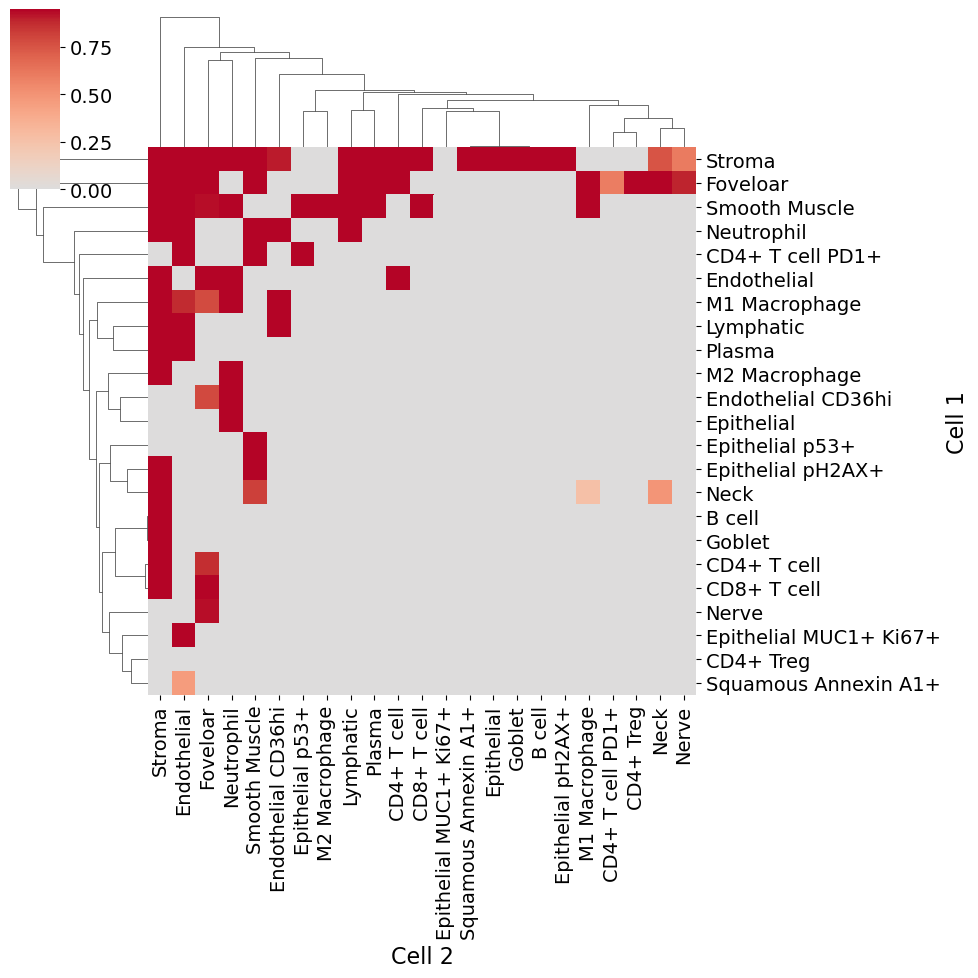

In [265]:
#Plot out the cell-cell pair significance and set the cluster based on D
df_sub_m = dfrr[['Cell 1','Cell 2','pvalue_D']]

#Plot with tissue order preserved
table_D = pd.pivot_table(df_sub_m, values='pvalue_D', index=['Cell 1'],
                    columns=['Cell 2'])
table_D = table_D.fillna(0)

plt.figure(figsize = (5,5))

ax1=sns.clustermap(table_D, cmap='coolwarm',center=0,vmax=0.95)

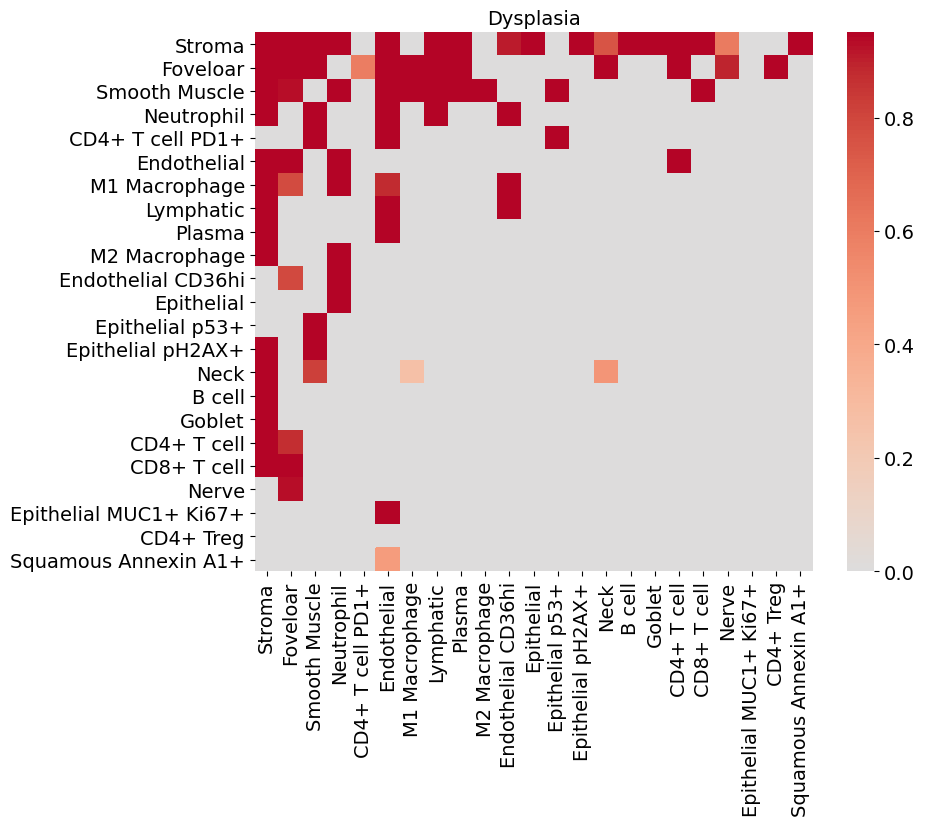

In [275]:
order = ax1.dendrogram_row.reordered_ind
#order2 = ax.dendrogram_col.reordered_ind

ind = table_D.index[order]
table_D2 = table_D.reindex(ind)
table_D3 = table_D2[ind.to_list()]

plt.figure(figsize = (9,7))

ax=sns.heatmap(table_D3, cmap='coolwarm',center=0,vmax=0.95)

ax.set_title('Dysplasia') 
ax.set_ylabel('')    
ax.set_xlabel('')
plt.savefig(save_path+'D_cellpair.png', format='png', dpi=300, transparent=True, bbox_inches='tight')

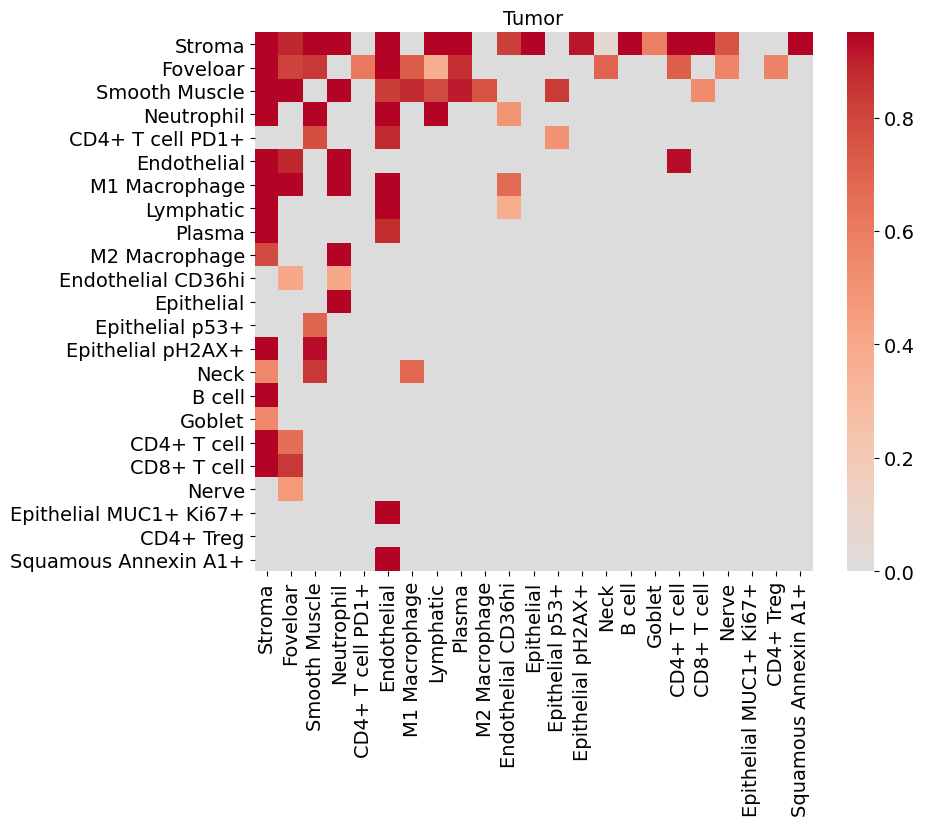

In [276]:
#Plot out the cell-cell pair significance
df_sub_m = dfrr[['Cell 1','Cell 2','pvalue_T']]

#Plot with tissue order preserved
table_T = pd.pivot_table(df_sub_m, values='pvalue_T', index=['Cell 1'],
                    columns=['Cell 2'])
table_T = table_T.fillna(0)


order = ax1.dendrogram_row.reordered_ind
#order2 = ax.dendrogram_col.reordered_ind

ind = table_T.index[order]
table_T2 = table_T.reindex(ind)
table_T3 = table_T2[ind.to_list()]

plt.figure(figsize = (9,7))

ax=sns.heatmap(table_T3, cmap='coolwarm',center=0,vmax=0.95)
ax.set_title('Tumor') 
ax.set_ylabel('')    
ax.set_xlabel('')
plt.savefig(save_path+'T_cellpair.png', format='png', dpi=300, transparent=True, bbox_inches='tight')

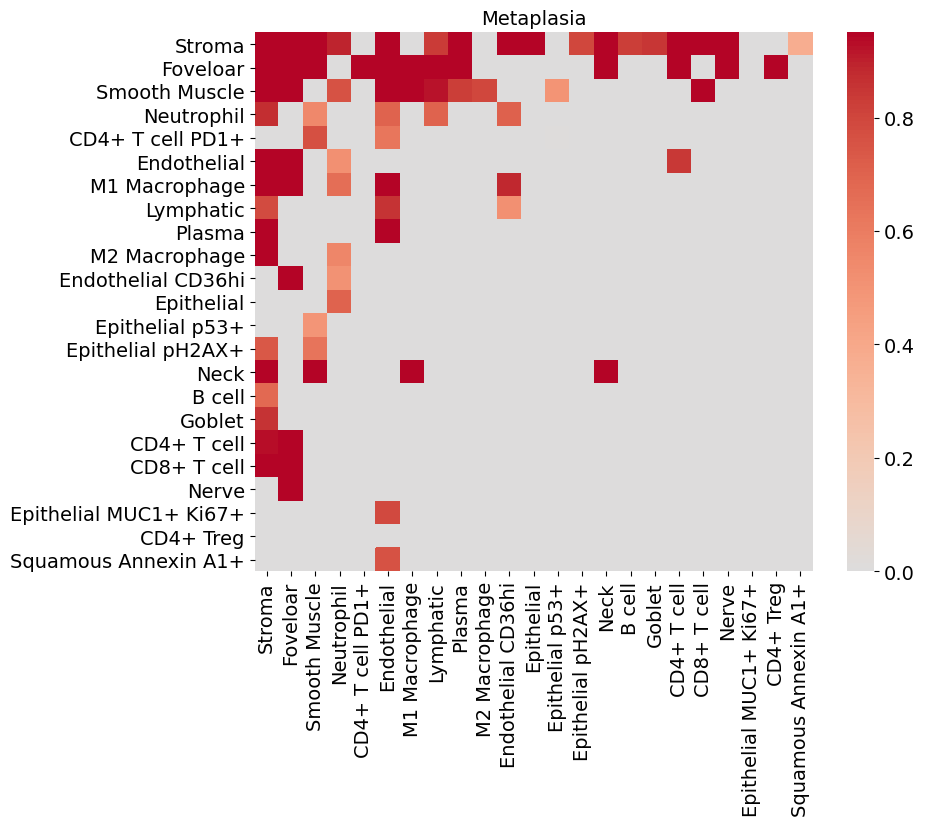

In [277]:
#Plot out the cell-cell pair significance
df_sub_m = dfrr[['Cell 1','Cell 2','pvalue_M']]

#Plot with tissue order preserved
table_M = pd.pivot_table(df_sub_m, values='pvalue_M', index=['Cell 1'],
                    columns=['Cell 2'])
table_M = table_M.fillna(0)


order = ax1.dendrogram_row.reordered_ind
#order2 = ax.dendrogram_col.reordered_ind

ind = table_M.index[order]
table_M2 = table_M.reindex(ind)
table_M3 = table_M2[ind.to_list()]

plt.figure(figsize = (9,7))

ax=sns.heatmap(table_M3, cmap='coolwarm',center=0,vmax=0.95)
ax.set_title('Metaplasia') 
ax.set_ylabel('')    
ax.set_xlabel('')
plt.savefig(save_path+'M_cellpair.png', format='png', dpi=300, transparent=True, bbox_inches='tight')

In [278]:
##Next steps plot the p values for the unique cell type pairs I want to highlight in swarmboxplot style

In [25]:
p_thres = 0.95
M_DT = dfrr.loc[((dfrr['pvalue_M']>p_thres)&(dfrr['pvalue_D']<p_thres)&(dfrr['pvalue_T']<p_thres))]['Cell Pair'].to_list()
D_MT = dfrr.loc[((dfrr['pvalue_M']<p_thres)&(dfrr['pvalue_D']>p_thres)&(dfrr['pvalue_T']<p_thres))]['Cell Pair'].to_list()
T_MD = dfrr.loc[((dfrr['pvalue_M']<p_thres)&(dfrr['pvalue_D']<p_thres)&(dfrr['pvalue_T']>p_thres))]['Cell Pair'].to_list()
DM_T = dfrr.loc[((dfrr['pvalue_M']>p_thres)&(dfrr['pvalue_D']>p_thres)&(dfrr['pvalue_T']<p_thres))]['Cell Pair'].to_list()
MT_D = dfrr.loc[((dfrr['pvalue_M']>p_thres)&(dfrr['pvalue_D']<p_thres)&(dfrr['pvalue_T']>p_thres))]['Cell Pair'].to_list()
DT_M = dfrr.loc[((dfrr['pvalue_M']<p_thres)&(dfrr['pvalue_D']>p_thres)&(dfrr['pvalue_T']>p_thres))]['Cell Pair'].to_list()
DTM = dfrr.loc[((dfrr['pvalue_M']>p_thres)&(dfrr['pvalue_D']>p_thres)&(dfrr['pvalue_T']>p_thres))]['Cell Pair'].to_list()
DTM

['CD8+ T cell_Stroma',
 'Endothelial_Stroma',
 'Foveloar_Endothelial',
 'Foveloar_Stroma',
 'M1 Macrophage_Stroma',
 'Plasma_Stroma',
 'Smooth Muscle_Stroma',
 'Stroma_CD8+ T cell',
 'Stroma_Endothelial',
 'Stroma_Epithelial',
 'Stroma_Plasma',
 'Stroma_Smooth Muscle',
 'Stroma_Stroma']

In [26]:
M_DT

['CD4+ T cell_Foveloar',
 'Endothelial CD36hi_Foveloar',
 'Foveloar_CD4+ T cell PD1+',
 'Foveloar_Nerve',
 'Neck_M1 Macrophage',
 'Neck_Neck',
 'Neck_Smooth Muscle',
 'Nerve_Foveloar',
 'Stroma_Endothelial CD36hi',
 'Stroma_Neck',
 'Stroma_Nerve']

In [27]:
D_MT

['CD4+ T cell PD1+_Endothelial',
 'CD4+ T cell PD1+_Epithelial p53+',
 'CD4+ T cell PD1+_Smooth Muscle',
 'Endothelial CD36hi_Neutrophil',
 'Endothelial_CD4+ T cell',
 'Epithelial p53+_Smooth Muscle',
 'Epithelial pH2AX+_Smooth Muscle',
 'Goblet_Stroma',
 'Lymphatic_Endothelial CD36hi',
 'M1 Macrophage_Endothelial CD36hi',
 'Neutrophil_Endothelial',
 'Neutrophil_Endothelial CD36hi',
 'Smooth Muscle_Epithelial p53+',
 'Smooth Muscle_Lymphatic',
 'Smooth Muscle_M2 Macrophage',
 'Smooth Muscle_Plasma',
 'Stroma_Epithelial pH2AX+',
 'Stroma_Goblet']

In [28]:
T_MD

['Squamous Annexin A1+_Endothelial']

In [29]:
DM_T

['CD8+ T cell_Foveloar',
 'Endothelial_Foveloar',
 'Foveloar_CD4+ T cell',
 'Foveloar_CD4+ Treg',
 'Foveloar_Foveloar',
 'Foveloar_Lymphatic',
 'Foveloar_M1 Macrophage',
 'Foveloar_Neck',
 'Foveloar_Plasma',
 'Foveloar_Smooth Muscle',
 'M2 Macrophage_Stroma',
 'Neck_Stroma',
 'Plasma_Endothelial',
 'Smooth Muscle_CD8+ T cell',
 'Smooth Muscle_Endothelial',
 'Smooth Muscle_M1 Macrophage',
 'Stroma_Foveloar']

In [30]:
MT_D

['M1 Macrophage_Endothelial',
 'M1 Macrophage_Foveloar',
 'Smooth Muscle_Foveloar']

In [31]:
DT_M

['B cell_Stroma',
 'CD4+ T cell_Stroma',
 'Endothelial_Neutrophil',
 'Epithelial MUC1+ Ki67+_Endothelial',
 'Epithelial pH2AX+_Stroma',
 'Epithelial_Neutrophil',
 'Lymphatic_Endothelial',
 'Lymphatic_Stroma',
 'M1 Macrophage_Neutrophil',
 'M2 Macrophage_Neutrophil',
 'Neutrophil_Lymphatic',
 'Neutrophil_Smooth Muscle',
 'Neutrophil_Stroma',
 'Smooth Muscle_Neutrophil',
 'Stroma_B cell',
 'Stroma_CD4+ T cell',
 'Stroma_Lymphatic',
 'Stroma_Neutrophil',
 'Stroma_Squamous Annexin A1+']

In [32]:
dfrr

,Cell Pair,unique_region_M,pvalue_M,FC_M,Number Occurred_M,consensus diagnosis_M,unique_region_D,pvalue_D,FC_D,Number Occurred_D,consensus diagnosis_D,unique_region,pvalue_T,FC_T,Number Occurred_T,consensus diagnosis_T,Cell 1,Cell 2
0,B cell_Stroma,14,0.67870,1.057560,49.0,M,3,0.9997,1.325180,135.0,D,8,0.96000,1.125166,74.0,T,B cell,Stroma
1,CD4+ T cell PD1+_Endothelial,14,0.62630,1.023754,83.5,M,3,0.9621,1.186705,163.0,D,8,0.88015,1.104587,189.5,T,CD4+ T cell PD1+,Endothelial
2,CD4+ T cell PD1+_Epithelial p53+,12,0.00815,0.112247,0.5,M,3,0.9904,1.217927,98.0,D,8,0.50490,1.006019,4.0,T,CD4+ T cell PD1+,Epithelial p53+
3,CD4+ T cell PD1+_Smooth Muscle,14,0.76820,1.095073,105.0,M,3,0.9881,1.105039,329.0,D,8,0.77540,1.124511,45.5,T,CD4+ T cell PD1+,Smooth Muscle
4,CD4+ T cell_Foveloar,14,0.99690,1.140755,381.5,M,3,0.8756,1.084170,106.0,D,8,0.65835,1.021077,93.5,T,CD4+ T cell,Foveloar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Stroma_Plasma,14,0.96210,1.095421,592.0,M,3,1.0000,1.150895,973.0,D,8,0.99090,1.164348,248.5,T,Stroma,Plasma
79,Stroma_Smooth Muscle,14,0.99980,1.119903,1026.0,M,3,1.0000,1.112648,3313.0,D,8,0.96310,1.126688,135.0,T,Stroma,Smooth Muscle
80,Stroma_Squamous Annexin A1+,12,0.37660,1.003501,31.5,M,3,0.9750,1.061785,38.0,D,8,0.99930,1.128652,1460.0,T,Stroma,Squamous Annexin A1+
81,Stroma_Stroma,14,0.99935,1.110149,1441.0,M,3,1.0000,1.119433,4842.0,D,8,1.00000,1.121476,3616.5,T,Stroma,Stroma


In [33]:
df_M['logp'] = -np.log10(1-df_M['pvalue_M'])
df_D['logp'] = -np.log10(1-df_D['pvalue_D'])
df_T['logp'] = -np.log10(1-df_T['pvalue_T'])

/Users/jwhickey/opt/anaconda3/envs/squidpy/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-33-0531e88fa837>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M['logp'] = -np.log10(1-df_M['pvalue_M'])
/Users/jwhickey/opt/anaconda3/envs/squidpy/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-33-0531e88fa837>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [34]:
df_M.loc[~(df_M['logp'].isin([np.inf, -np.inf]))]['logp'].max()

4.000000000000048

In [35]:
df_D.loc[~(df_D['logp'].isin([np.inf, -np.inf]))]['logp'].max()

4.000000000000048

In [36]:
df_T.loc[~(df_T['logp'].isin([np.inf, -np.inf]))]['logp'].max()

4.000000000000048

In [37]:
df_M['logp'].max()

inf

In [38]:
df_M.loc[df_M['logp'].isin([np.inf, -np.inf]), "logp"] = 4
df_D.loc[df_D['logp'].isin([np.inf, -np.inf]), "logp"] = 4
df_T.loc[df_T['logp'].isin([np.inf, -np.inf]), "logp"] = 4

In [39]:
df_M['logp'].max()

4.000000000000048

In [40]:
cell_map = {
'B cell': '#ffbb78',
 'CD4+ T cell': 'beige',
 'CD8+ T cell': '#c5b0d5',
 'Neutrophil': '#ff7f0e',
 'Endothelial': '#17becf',
 'Stroma': '#aec7e8',
 'Smooth Muscle': 'plum',
 'Neuroendocrine': '#98df8a',
 'Epithelial': '#2ca02c',
 'Parietal': '#bcbd22',
 'Squamous p63+': '#dbdb8d',
'CD4+ Treg': (0.00784313725490196, 0.24313725490196078, 1.0),
 'Chief': (0.0, 0.8431372549019608, 1.0),
 'DC': (0.9098039215686274, 0.0, 0.043137254901960784),
 'Foveloar': (1.0, 0.7686274509803922, 0.0),
 'Goblet': (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 'Lymphatic': (1.0, 0.48627450980392156, 0.0),
 'M1 Macrophage': (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 'M2 Macrophage': (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 'Neck': (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 'Nerve': (0.6235294117647059, 0.2823529411764706, 0.0),
 'Paneth': 'dodgerblue',
 'Plasma': 'lightblue',
    'CD4+ T cell PD1+': 'orange',
 'CD8+ T cell PD1+': '#9edae5',
 'Endothelial CD36hi': 'thistle',
 'Endothelial aSMAhi': 'lightgreen',
 'Epithelial CD73hi': 'green',
 'Epithelial CK7+': 'gold',
 'Epithelial CK7+ p53+': 'yellow',
 'Epithelial HLADR+': 'gray',
 'Epithelial Ki67+ p53+': 'brown',
 'Epithelial MUC1+ Ki67+': 'yellowgreen',
 'Epithelial p53+': 'tan',
 'Epithelial pH2AX+': 'navy',
 'Foveloar Ki67+ p53+': 'bisque',
 'Foveloar p53+': 'goldenrod',
 'Goblet Ki67+ p53+': 'blueviolet',
 'Goblet p53+': 'darkorange',
 'Lymphatic CD73+': 'teal',
 'Neck Ki67+ p53+': 'olive',
 'Neck p53+': 'dimgray',
 'Squamous Annexin A1+': 'indigo',
 'Squamous p63+ EGFRhi': 'lightcoral',
 'Stroma CD73+': 'cyan'
}


dis_map = {"NE" :"#339933",
        "M"  : "#FFCC33",
         "D"  :"#FF6600",
         "T"  : "#B22222"}
con_order = ['NE','M', 'D','T']
con_order1 = ['M', 'D','T']


In [41]:
def plot_pair_p(cellp_list,fig_sizing=(2,3), save_name=None,orient='v'):

    df_M.rename(columns={'consensus diagnosis_M':'consensus diagnosis',}, inplace=True)
    df_D.rename(columns={'consensus diagnosis_D':'consensus diagnosis',}, inplace=True)
    df_T.rename(columns={'consensus diagnosis_T':'consensus diagnosis',}, inplace=True)
    
    M_set = df_M.loc[df_M['Cell Pair'].isin(cellp_list)][['Cell Pair','logp','unique_region','consensus diagnosis']]
    D_set = df_D.loc[df_D['Cell Pair'].isin(cellp_list)][['Cell Pair','logp','unique_region','consensus diagnosis']]
    T_set = df_T.loc[df_T['Cell Pair'].isin(cellp_list)][['Cell Pair','logp','unique_region','consensus diagnosis']]

    combined_pair = pd.concat([M_set, D_set, T_set])

    plt.figure(figsize=fig_sizing)
    if orient=='h':
    
        ax = sns.boxplot(data = combined_pair, x='logp',  y='Cell Pair', hue = 'consensus diagnosis', dodge=True,\
                         order=cellp_list, hue_order=con_order1, palette=dis_map, orient='h')
        ax = sns.swarmplot(data = combined_pair, x='logp',  y='Cell Pair', hue = 'consensus diagnosis', dodge=True,\
                           order=cellp_list, hue_order=con_order1, edgecolor='black',linewidth=1, palette=dis_map, orient='h')
    
        for patch in ax.artists:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .3))
    
        plt.xlabel('-log(p value)')
        plt.ylabel('')
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[:len(combined_pair['consensus diagnosis'].unique())], \
                   labels[:len(combined_pair['consensus diagnosis'].unique())],  \
                   bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)

        sns.despine()
    
    
    else: 
        ax = sns.boxplot(data = combined_pair, x='Cell Pair',  y='logp', hue = 'consensus diagnosis', dodge=True,\
                         order=cellp_list, hue_order=con_order1, palette=dis_map, orient='v')
        ax = sns.swarmplot(data = combined_pair, x='Cell Pair', y='logp', hue = 'consensus diagnosis', dodge=True,\
                           order=cellp_list, hue_order=con_order1, edgecolor='black',linewidth=1, palette=dis_map, orient='v')
    
        for patch in ax.artists:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .3))

        plt.xlabel('')
        plt.ylabel('-log(p value)')
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[:len(combined_pair['consensus diagnosis'].unique())], \
                   labels[:len(combined_pair['consensus diagnosis'].unique())],  \
                   bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
        plt.xticks(rotation=90)

        #ax.set(ylim=(0,combined_pair['logp'].max()+1))
        sns.despine()
    if save_name:
        plt.savefig(save_path+save_name+'cellpp_boxplot.png', format='png', dpi=300, transparent=True, bbox_inches='tight')


/Users/jwhickey/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/Users/jwhickey/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jwhickey/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jwhickey/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be pla

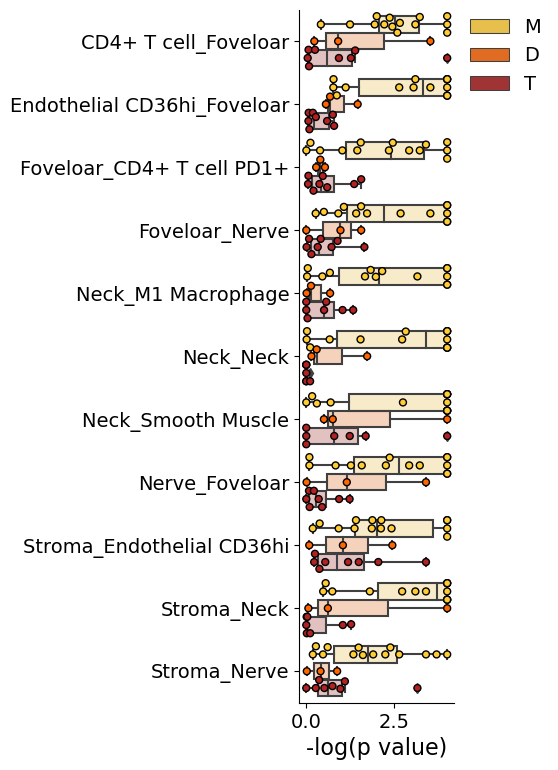

In [380]:
cellpair_list = ['Foveloar_Nerve','CD4+ T cell_Foveloar']

plot_pair_p(cellp_list = M_DT,fig_sizing=(2,9), save_name=None, orient='h')

/Users/jwhickey/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


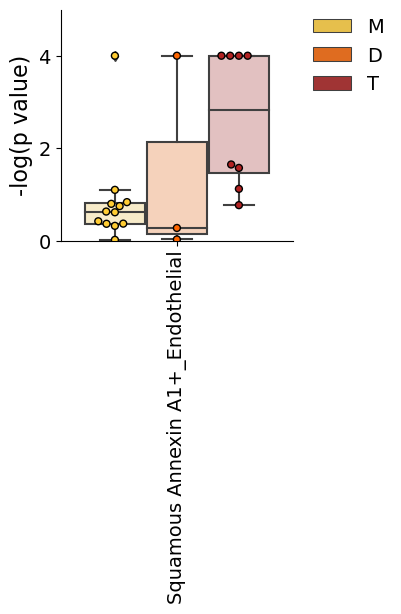

In [367]:
plot_pair_p(cellp_list = T_MD,fig_sizing=(3,3), save_name=None)

In [ ]:
#Psuedotime with the cell-cell pair statistics in sample

In [ ]:
#Pairs
# DTM
#'CD8+ T cell_Stroma',
# 'Foveloar_Endothelial',
# 'M1 Macrophage_Stroma',
# 'Plasma_Stroma',

# M_DT
# 'CD4+ T cell_Foveloar',
#  'Endothelial CD36hi_Foveloar',
#  'Foveloar_Nerve',

# D_MT
#  'CD4+ T cell PD1+_Epithelial p53+',
#  'Endothelial CD36hi_Neutrophil',
#  'Endothelial_CD4+ T cell',
#  'Lymphatic_Endothelial CD36hi',
#  'Neutrophil_Endothelial',
#  'Neutrophil_Endothelial CD36hi',

# MT_D

#T_MD

# DM_T
#  'Foveloar_CD4+ T cell',
#  'Foveloar_Lymphatic',
#  'Foveloar_Plasma',
#  'M2 Macrophage_Stroma',

# DT_M

#  'Endothelial_Neutrophil',
#  'Epithelial_Neutrophil',
#  'M1 Macrophage_Neutrophil',
#  'Neutrophil_Lymphatic',
#  'Neutrophil_Stroma',


In [44]:
total_list = [
# M_DT
 'Endothelial CD36hi_Foveloar',
 'Foveloar_Nerve',
    
# DM_T
 'Foveloar_CD4+ T cell',
  'Foveloar_Plasma',
    'Foveloar_Lymphatic',

    
# D_MT
 'CD4+ T cell PD1+_Epithelial p53+',
 'Endothelial CD36hi_Neutrophil',
  'Lymphatic_Endothelial CD36hi',
    'Endothelial_CD4+ T cell',
# 'Neutrophil_Endothelial CD36hi',
    
# DT_M
    'Neutrophil_Lymphatic',
    'Endothelial_Neutrophil',


 'Epithelial_Neutrophil',
 'M1 Macrophage_Neutrophil',
# 'Neutrophil_Stroma',


]

DTM_sub =[
    # DTM
'CD8+ T cell_Stroma',
'Foveloar_Endothelial',
'M1 Macrophage_Stroma',
'Plasma_Stroma',
]

/Users/jwhickey/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/Users/jwhickey/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jwhickey/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jwhickey/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be pla

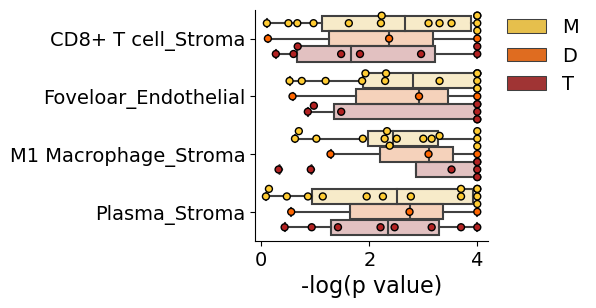

In [384]:
plot_pair_p(cellp_list = DTM_sub,fig_sizing=(3,3),orient='h', save_name='Cell Pair_all')

In [42]:
total_list

['CD4+ T cell_Foveloar',
 'CD8+ T cell_Foveloar',
 'CD8+ T cell_Stroma',
 'Endothelial CD36hi_Foveloar',
 'Endothelial_Foveloar',
 'Endothelial_Stroma',
 'Foveloar_CD4+ T cell PD1+',
 'Foveloar_Endothelial',
 'Foveloar_Foveloar',
 'Foveloar_M1 Macrophage',
 'Foveloar_Neck',
 'Foveloar_Nerve',
 'Foveloar_Plasma',
 'Foveloar_Smooth Muscle',
 'Foveloar_Stroma',
 'M1 Macrophage_Endothelial',
 'M1 Macrophage_Foveloar',
 'M1 Macrophage_Stroma',
 'Neck_M1 Macrophage',
 'Neck_Neck',
 'Neck_Smooth Muscle',
 'Neck_Stroma',
 'Nerve_Foveloar',
 'Smooth Muscle_Foveloar',
 'Smooth Muscle_Stroma',
 'Stroma_CD8+ T cell',
 'Stroma_Endothelial',
 'Stroma_Endothelial CD36hi',
 'Stroma_Foveloar',
 'Stroma_Neck',
 'Stroma_Nerve',
 'Stroma_Smooth Muscle',
 'Stroma_Stroma',
 'B cell_Stroma',
 'CD4+ T cell PD1+_Endothelial',
 'CD4+ T cell PD1+_Epithelial p53+',
 'CD4+ T cell PD1+_Smooth Muscle',
 'CD4+ T cell_Stroma',
 'Endothelial CD36hi_Neutrophil',
 'Endothelial_CD4+ T cell',
 'Endothelial_Foveloar',
 'End

<ipython-input-41-b08a3e92e67a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M.rename(columns={'consensus diagnosis_M':'consensus diagnosis',}, inplace=True)
<ipython-input-41-b08a3e92e67a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_D.rename(columns={'consensus diagnosis_D':'consensus diagnosis',}, inplace=True)
<ipython-input-41-b08a3e92e67a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T.rename(columns={'consen

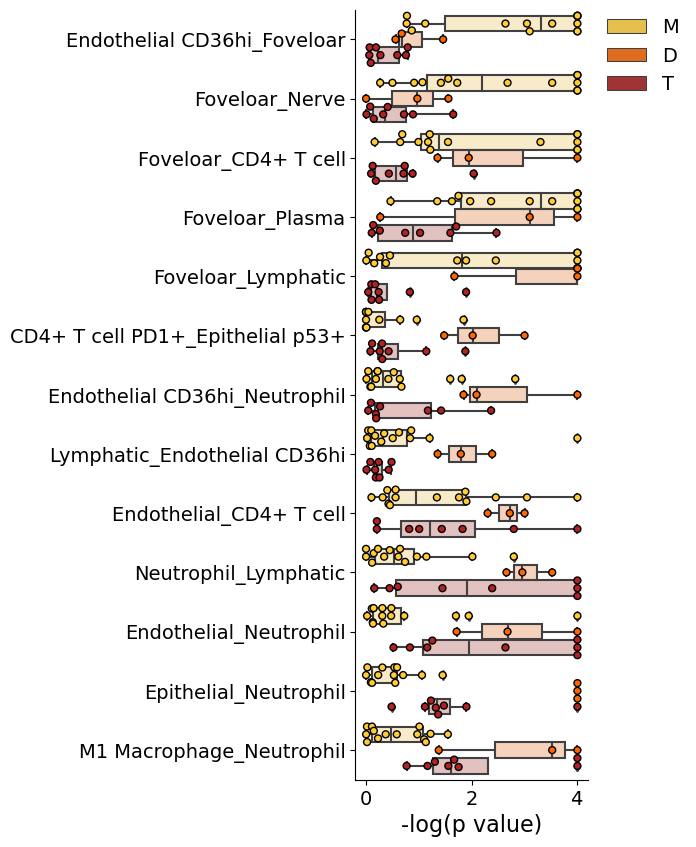

In [45]:
plot_pair_p(cellp_list = total_list,fig_sizing=(3,10),orient='h', save_name='Cell Pair')

/Users/jwhickey/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/Users/jwhickey/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jwhickey/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jwhickey/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be pla

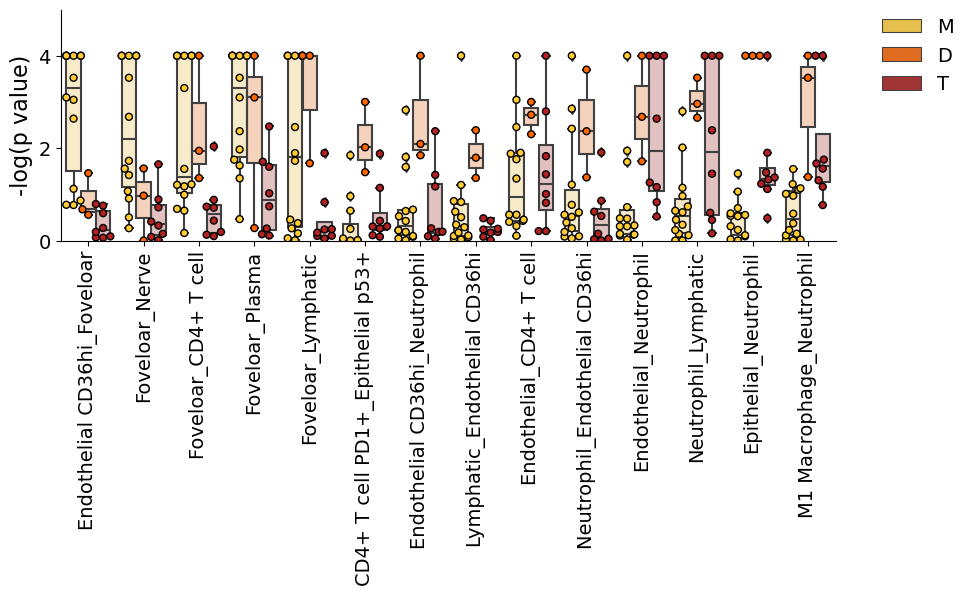

In [368]:
plot_pair_p(cellp_list = total_list,fig_sizing=(10,3), save_name=None)

In [186]:


# from functools import reduce
# df_merged = reduce(lambda x, y: pd.merge(x, y, on=['Cell Pair', 'unique_region',]), dfList)


# df_merged = pd.merge(df_M, df_D, on=['Cell Pair', 'unique_region'], how='outer')
# df_merged
# #Calculate the statistics to plot and select interersting pairs
# df_merged['max_p'] = df_merged[['pvalue','pvalue_T']].min(axis=1)
# df_m = df_merged.loc[df_merged['max_p']<0.05]
# df_m['delta log fold distance (M-T)'] = df_m['log fold distance M'] - df_m['Fraction of Neighbors_T']
# df_m['log_p'] = -np.log(df_m['max_p'])
# df_m

In [10]:
#Thresholds for plotting
df_m['enriched pair']=np.where((df_m['delta log fold distance (M-T)']<-0.5)&(df_m['log fold distance M']<-0.15),'Metaplasia','not enriched')

<ipython-input-10-6cf3b51c910d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['enriched pair']=np.where((df_m['delta log fold distance (M-T)']<-0.5)&(df_m['log fold distance M']<-0.15),'Metaplasia','not enriched')


In [11]:
#GENERAL GRAPH SETTINGs
#font size of graph
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

#Settings for graph
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [12]:
tt = df_m.sort_values(by=['delta log fold distance (M-T)'])
tt

,celltype1,celltype2,consensus.diagnosis,expected_mean,observed_mean,pvalue,log fold distance M,interaction,pairs_x,consensus.diagnosis_T,expected_mean_T,observed_mean_T,pvalue_T,logfold_group_T,pairs_y,max_p,delta log fold distance (M-T),log_p,enriched pair
293,Neck,Goblet,M,35.338668,28.094833,1.865943e-82,-0.330943,Neck --> Goblet,Neck_Goblet,T,30.410880,55.002725,5.782262e-02,0.854916,Neck_Goblet,1.865943e-82,-1.185858,188.188211,Metaplasia
209,Goblet,Neck,M,34.924070,28.717973,7.819747e-69,-0.282268,Goblet --> Neck,Goblet_Neck,T,30.553319,47.666696,2.751686e-01,0.641652,Goblet_Neck,7.819747e-69,-0.923920,156.821719,Metaplasia
191,Foveloar,Parietal,M,34.542386,31.162933,1.101993e-35,-0.148537,Foveloar --> Parietal,Foveloar_Parietal,T,32.081032,49.421779,2.167945e-04,0.623426,Foveloar_Parietal,1.101993e-35,-0.771963,80.493358,not enriched
432,Squamous,B cell,M,35.563857,24.785033,1.037209e-08,-0.520943,Squamous --> B cell,Squamous_B cell,T,31.799751,36.814794,8.507479e-07,0.211270,Squamous_B cell,1.037209e-08,-0.732213,18.384147,Metaplasia
442,Squamous,Lymphatic,M,36.936248,31.631367,8.848256e-04,-0.223681,Squamous --> Lymphatic,Squamous_Lymphatic,T,31.824247,44.952361,2.026104e-60,0.498271,Squamous_Lymphatic,2.026104e-60,-0.721952,137.448991,Metaplasia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Goblet,Nerve,M,35.560126,32.191340,1.920966e-04,-0.143588,Goblet --> Nerve,Goblet_Nerve,T,29.203118,17.612644,1.697594e-01,-0.729511,Goblet_Nerve,1.920966e-04,0.585923,8.557512,not enriched
122,DC,Nerve,M,31.429967,33.971834,9.260947e-01,0.112198,DC --> Nerve,DC_Nerve,T,32.382293,22.418950,3.969661e-02,-0.530486,DC_Nerve,3.969661e-02,0.642685,3.226489,not enriched
308,Nerve,DC,M,31.449440,34.475796,9.680225e-01,0.132550,Nerve --> DC,Nerve_DC,T,32.417043,22.418950,3.969661e-02,-0.532034,Nerve_DC,3.969661e-02,0.664583,3.226489,not enriched
360,Neutrophil,Neuroendocrine,M,36.136402,46.258000,1.741838e-01,0.356250,Neutrophil --> Neuroendocrine,Neutrophil_Neuroendocrine,T,31.701751,23.887638,6.061890e-14,-0.408298,Neutrophil_Neuroendocrine,6.061890e-14,0.764548,30.434170,not enriched


In [ ]:
##check percentages of these cells tomorrow
##send Yuqi pairs that are interesting to plot
##check certain cell types like CD4+ Treg, Endothelial CD36hi, Lymphatic, B cell, Neuroendocrine cell

In [17]:
both_enrich = tt.loc[(tt['log fold distance M']<-0.4)&(tt['logfold_group_T']<-0.4)]
both_enrich

,celltype1,celltype2,consensus.diagnosis,expected_mean,observed_mean,pvalue,log fold distance M,interaction,pairs_x,consensus.diagnosis_T,expected_mean_T,observed_mean_T,pvalue_T,logfold_group_T,pairs_y,max_p,delta log fold distance (M-T),log_p,enriched pair
9,B cell,Goblet,M,33.246037,20.345929,4.015091e-05,-0.708442,B cell --> Goblet,B cell_Goblet,T,29.750608,21.105134,9.885075e-05,-0.495325,B cell_Goblet,4.015091e-05,-0.213117,10.122865,not enriched
200,Goblet,Chief,M,36.197478,22.854515,6.189066e-07,-0.663410,Goblet --> Chief,Goblet_Chief,T,27.899685,20.099751,2.858640e-01,-0.473071,Goblet_Chief,6.189066e-07,-0.190339,14.295311,not enriched
0,B cell,B cell,M,31.674848,20.281763,3.663307e-158,-0.643155,B cell --> B cell,B cell_B cell,T,31.751295,23.077955,3.868096e-102,-0.460300,B cell_B cell,3.663307e-158,-0.182855,362.510078,not enriched
196,Goblet,B cell,M,33.407769,24.654170,8.292521e-02,-0.438352,Goblet --> B cell,Goblet_B cell,T,29.694866,22.307634,2.115205e-03,-0.412676,Goblet_B cell,2.115205e-03,-0.025676,6.158604,not enriched
97,Chief,Goblet,M,35.983861,26.221750,1.713642e-05,-0.456586,Chief --> Goblet,Chief_Goblet,T,27.800682,20.099751,2.780392e-01,-0.467943,Chief_Goblet,1.713642e-05,0.011357,10.974305,not enriched
15,B cell,Neuroendocrine,M,34.886717,24.123997,1.423203e-32,-0.532209,B cell --> Neuroendocrine,B cell_Neuroendocrine,T,31.915971,18.383427,2.893752e-08,-0.795873,B cell_Neuroendocrine,1.423203e-32,0.263664,73.329813,not enriched


In [13]:
lbl_total2 = tt.loc[(tt['delta log fold distance (M-T)']>0.5)&(tt['logfold_group_T']<-0.15)]

lbl_total2

,celltype1,celltype2,consensus.diagnosis,expected_mean,observed_mean,pvalue,log fold distance M,interaction,pairs_x,consensus.diagnosis_T,expected_mean_T,observed_mean_T,pvalue_T,logfold_group_T,pairs_y,max_p,delta log fold distance (M-T),log_p,enriched pair
313,Nerve,Lymphatic,M,34.919752,43.897523,7.928469e-17,0.330096,Nerve --> Lymphatic,Nerve_Lymphatic,T,30.725701,27.084525,1.196666e-02,-0.181977,Nerve_Lymphatic,7.928469e-17,0.512073,37.073487,not enriched
312,Nerve,Goblet,M,35.339073,31.681117,2.727826e-03,-0.157641,Nerve --> Goblet,Nerve_Goblet,T,29.213389,17.612644,7.844538e-02,-0.730018,Nerve_Goblet,2.727826e-03,0.572377,5.904250,not enriched
232,Lymphatic,Nerve,M,34.773769,43.410953,3.658664e-15,0.320060,Lymphatic --> Nerve,Lymphatic_Nerve,T,30.924068,25.781307,1.328862e-03,-0.262405,Lymphatic_Nerve,3.658664e-15,0.582464,33.241678,not enriched
210,Goblet,Nerve,M,35.560126,32.191340,1.920966e-04,-0.143588,Goblet --> Nerve,Goblet_Nerve,T,29.203118,17.612644,1.697594e-01,-0.729511,Goblet_Nerve,1.920966e-04,0.585923,8.557512,not enriched
122,DC,Nerve,M,31.429967,33.971834,9.260947e-01,0.112198,DC --> Nerve,DC_Nerve,T,32.382293,22.418950,3.969661e-02,-0.530486,DC_Nerve,3.969661e-02,0.642685,3.226489,not enriched
308,Nerve,DC,M,31.449440,34.475796,9.680225e-01,0.132550,Nerve --> DC,Nerve_DC,T,32.417043,22.418950,3.969661e-02,-0.532034,Nerve_DC,3.969661e-02,0.664583,3.226489,not enriched
360,Neutrophil,Neuroendocrine,M,36.136402,46.258000,1.741838e-01,0.356250,Neutrophil --> Neuroendocrine,Neutrophil_Neuroendocrine,T,31.701751,23.887638,6.061890e-14,-0.408298,Neutrophil_Neuroendocrine,6.061890e-14,0.764548,30.434170,not enriched
339,Neuroendocrine,Neutrophil,M,36.148100,50.790592,1.839561e-03,0.490641,Neuroendocrine --> Neutrophil,Neuroendocrine_Neutrophil,T,31.468222,23.314546,4.500027e-08,-0.432665,Neuroendocrine_Neutrophil,4.500027e-08,0.923307,16.916597,not enriched


In [15]:
lbl_total = tt.loc[(tt['delta log fold distance (M-T)']<-0.5)&(tt['log fold distance M']<-0.15)]

lbl_total

,celltype1,celltype2,consensus.diagnosis,expected_mean,observed_mean,pvalue,log fold distance M,interaction,pairs_x,consensus.diagnosis_T,expected_mean_T,observed_mean_T,pvalue_T,logfold_group_T,pairs_y,max_p,delta log fold distance (M-T),log_p,enriched pair
293,Neck,Goblet,M,35.338668,28.094833,1.865943e-82,-0.330943,Neck --> Goblet,Neck_Goblet,T,30.410880,55.002725,5.782262e-02,0.854916,Neck_Goblet,1.865943e-82,-1.185858,188.188211,Metaplasia
209,Goblet,Neck,M,34.924070,28.717973,7.819747e-69,-0.282268,Goblet --> Neck,Goblet_Neck,T,30.553319,47.666696,2.751686e-01,0.641652,Goblet_Neck,7.819747e-69,-0.923920,156.821719,Metaplasia
432,Squamous,B cell,M,35.563857,24.785033,1.037209e-08,-0.520943,Squamous --> B cell,Squamous_B cell,T,31.799751,36.814794,8.507479e-07,0.211270,Squamous_B cell,1.037209e-08,-0.732213,18.384147,Metaplasia
442,Squamous,Lymphatic,M,36.936248,31.631367,8.848256e-04,-0.223681,Squamous --> Lymphatic,Squamous_Lymphatic,T,31.824247,44.952361,2.026104e-60,0.498271,Squamous_Lymphatic,2.026104e-60,-0.721952,137.448991,Metaplasia
441,Squamous,Goblet,M,36.938037,30.000837,1.213114e-15,-0.300104,Squamous --> Goblet,Squamous_Goblet,T,30.822952,40.839874,1.305021e-04,0.405973,Squamous_Goblet,1.213114e-15,-0.706078,34.345585,Metaplasia
20,B cell,Squamous,M,35.078234,25.581072,2.728450e-07,-0.455499,B cell --> Squamous,B cell_Squamous,T,31.441288,35.856660,3.562901e-05,0.189581,B cell_Squamous,2.728450e-07,-0.645080,15.114362,Metaplasia
216,Goblet,Squamous,M,36.368430,31.052206,1.368364e-06,-0.227991,Goblet --> Squamous,Goblet_Squamous,T,30.732626,40.611077,1.132303e-01,0.402102,Goblet_Squamous,1.368364e-06,-0.630093,13.501894,Metaplasia
179,Foveloar,DC,M,34.325204,28.670529,3.235328e-27,-0.259700,Foveloar --> DC,Foveloar_DC,T,31.043665,38.408038,2.556345e-01,0.307109,Foveloar_DC,3.235328e-27,-0.566809,60.995667,Metaplasia
205,Goblet,Goblet,M,34.711429,30.148631,2.555550e-55,-0.203318,Goblet --> Goblet,Goblet_Goblet,T,28.846029,36.657307,1.076729e-17,0.345728,Goblet_Goblet,2.555550e-55,-0.549046,125.703913,Metaplasia
386,Parietal,Squamous,M,34.471408,28.214046,1.935365e-02,-0.288987,Parietal --> Squamous,Parietal_Squamous,T,34.486485,40.204936,4.222498e-01,0.221342,Parietal_Squamous,1.935365e-02,-0.510328,3.944874,Metaplasia


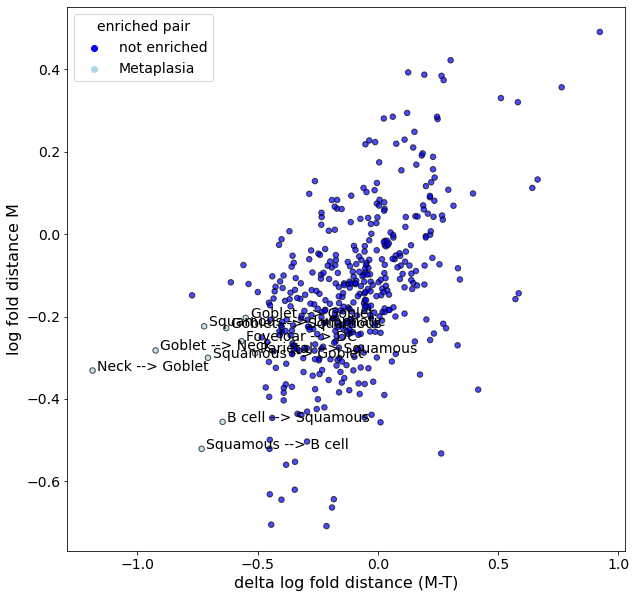

In [16]:
lbl_total = tt.loc[(tt['delta log fold distance (M-T)']<-0.5)&(tt['log fold distance M']<-0.15)]

plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df_m, x="delta log fold distance (M-T)", y="log fold distance M", hue='enriched pair', palette=['blue', 'lightblue'],\
                    linewidth=1, edgecolor='black',alpha=0.7,s=30)

for i, txt in enumerate(lbl_total['interaction']):
    ax.annotate(txt, (lbl_total['delta log fold distance (M-T)'].iat[i]+0.02,lbl_total['log fold distance M'].iat[i]))
    
#plt.savefig(save_path+'distance_calculation.png', format='png', dpi=300, transparent=True, bbox_inches='tight')   

In [11]:
save_path

'/Users/jwhickey/Nolan Lab Dropbox/John Hickey/CRUK/Cell_Atlas/analysis/Yuqi_cellpairing/'

In [22]:
df8 = tt.loc[tt['celltype1']=='Neuroendocrine']
df8

,celltype1,celltype2,consensus.diagnosis,expected_mean,observed_mean,pvalue,log fold distance M,interaction,pairs_x,consensus.diagnosis_D,expected_mean_D,observed_mean_D,pvalue_D,logfold_group_D,pairs_y,max_p,delta log fold distance (M-D),log_p,enriched pair
361,Neuroendocrine,Smooth Muscle,M,36.333575,33.344832,8.038720e-22,-0.123840,Neuroendocrine --> Smooth Muscle,Neuroendocrine_Smooth Muscle,D,35.835472,47.478723,4.970375e-05,0.405893,Neuroendocrine_Smooth Muscle,8.038720e-22,-0.529733,48.572602,Metaplasia
363,Neuroendocrine,Stroma,M,35.503225,32.883903,3.124767e-34,-0.110569,Neuroendocrine --> Stroma,Neuroendocrine_Stroma,D,35.989029,42.230533,3.270640e-01,0.230729,Neuroendocrine_Stroma,3.124767e-34,-0.341298,77.148534,Metaplasia
344,Neuroendocrine,CD8+ T cell,M,36.066055,31.561832,1.714510e-33,-0.192461,Neuroendocrine --> CD8+ T cell,Neuroendocrine_CD8+ T cell,D,35.893559,38.339532,1.790220e-01,0.095108,Neuroendocrine_CD8+ T cell,1.714510e-33,-0.287568,75.446180,Metaplasia
347,Neuroendocrine,Endothelial,M,36.361720,31.199772,7.662538e-41,-0.220885,Neuroendocrine --> Endothelial,Neuroendocrine_Endothelial,D,35.557841,37.212895,2.796528e-02,0.065635,Neuroendocrine_Endothelial,7.662538e-41,-0.286520,92.369646,Metaplasia
342,Neuroendocrine,CD4+ T cell,M,36.118609,31.289198,6.859857e-23,-0.207078,Neuroendocrine --> CD4+ T cell,Neuroendocrine_CD4+ T cell,D,36.331797,38.204627,1.929049e-02,0.072515,Neuroendocrine_CD4+ T cell,6.859857e-23,-0.279592,51.033771,Metaplasia
356,Neuroendocrine,Neuroendocrine,M,35.389107,27.121349,6.697877e-104,-0.383876,Neuroendocrine --> Neuroendocrine,Neuroendocrine_Neuroendocrine,D,36.356396,32.929777,7.336464e-07,-0.142816,Neuroendocrine_Neuroendocrine,6.697877e-104,-0.241060,237.567059,Metaplasia
360,Neuroendocrine,Plasma,M,36.367605,31.278720,3.956943e-22,-0.217472,Neuroendocrine --> Plasma,Neuroendocrine_Plasma,D,35.718819,36.174659,8.531002e-03,0.018295,Neuroendocrine_Plasma,3.956943e-22,-0.235767,49.281400,Metaplasia
352,Neuroendocrine,M1 Macrophage,M,35.882996,31.149635,5.799470e-31,-0.204085,Neuroendocrine --> M1 Macrophage,Neuroendocrine_M1 Macrophage,D,34.754419,34.587272,3.932709e-03,-0.006955,Neuroendocrine_M1 Macrophage,5.799470e-31,-0.197130,69.622371,Metaplasia
354,Neuroendocrine,Neck,M,35.880572,30.029357,2.648352e-68,-0.256829,Neuroendocrine --> Neck,Neuroendocrine_Neck,D,35.541166,31.237011,2.600375e-04,-0.186235,Neuroendocrine_Neck,2.648352e-68,-0.070595,155.601849,Metaplasia
350,Neuroendocrine,Goblet,M,35.132767,29.833225,9.429214e-40,-0.235897,Neuroendocrine --> Goblet,Neuroendocrine_Goblet,D,35.047588,31.052442,1.187558e-03,-0.174608,Neuroendocrine_Goblet,9.429214e-40,-0.061289,89.859591,Metaplasia


In [115]:
df8 = tt.loc[tt['celltype2']=='CD4+ Treg']
df8

,celltype1,celltype2,treatment,expected_mean,observed_mean,pvalue,logfold_group,interaction,treatment_T,expected_mean_T,observed_mean_T,pvalue_T,logfold_group_T,max_p,log2_change,log_p
79,Macrophage CD169+,CD4+ Treg,2HC T cells,44.740631,46.662966,4.610666e-01,0.060692,Macrophage CD169+ --> CD4+ Treg,T cells,39.150952,69.813125,0.002502,0.834451,2.501650e-03,-0.773758,5.990805
118,Stromal,CD4+ Treg,2HC T cells,44.315879,38.856848,6.759625e-06,-0.189655,Stromal --> CD4+ Treg,T cells,41.792153,54.949346,0.019470,0.394870,6.759625e-06,-0.584525,11.904543
157,Tumor PDL1+ MHCI+,CD4+ Treg,2HC T cells,40.642146,32.342768,1.127503e-06,-0.329533,Tumor PDL1+ MHCI+ --> CD4+ Treg,T cells,42.689320,42.967707,0.614901,0.009378,1.127503e-06,-0.338911,13.695505
53,DC,CD4+ Treg,2HC T cells,45.618480,37.393310,4.461615e-04,-0.286838,DC --> CD4+ Treg,T cells,41.522155,40.249230,0.636713,-0.044920,4.461615e-04,-0.241918,7.714830
105,NK,CD4+ Treg,2HC T cells,43.617850,33.678442,8.941423e-03,-0.373093,NK --> CD4+ Treg,T cells,39.057113,33.116928,0.781166,-0.238016,8.941423e-03,-0.135077,4.717061
27,CD8+ T cell,CD4+ Treg,2HC T cells,41.492610,30.087260,6.405713e-04,-0.463702,CD8+ T cell --> CD4+ Treg,T cells,39.951050,31.548201,0.172757,-0.340676,6.405713e-04,-0.123026,7.353150
131,Tumor,CD4+ Treg,2HC T cells,44.062724,37.409967,3.650267e-07,-0.236136,Tumor --> CD4+ Treg,T cells,43.324750,38.396862,0.000130,-0.174203,3.650267e-07,-0.061933,14.823295
66,Macrophage,CD4+ Treg,2HC T cells,45.273814,37.531542,5.398412e-04,-0.270573,Macrophage --> CD4+ Treg,T cells,41.905204,34.123146,0.029843,-0.296379,5.398412e-04,0.025805,7.524236
14,CD4+ Treg,CD4+ Treg,2HC T cells,41.783734,26.138242,2.396826e-02,-0.676779,CD4+ Treg --> CD4+ Treg,T cells,58.232735,32.781237,0.056799,-0.828960,2.396826e-02,0.152181,3.731025
1,CD4+ T cell,CD4+ Treg,2HC T cells,45.716635,31.556330,3.905736e-06,-0.534790,CD4+ T cell --> CD4+ Treg,T cells,37.743711,21.300424,0.109300,-0.825354,3.905736e-06,0.290564,12.453064
